n! means n × (n − 1) × ... × 3 × 2 × 1


For example, 10! = 10 × 9 × ... × 3 × 2 × 1 = 3628800,

and the sum of the digits in the number 10! is 3 + 6 + 2 + 8 + 8 + 0 + 0 = 27.


### Find the sum of the digits in the number 100!

In [1]:
# Python bignum support can do this one really easily.
# Interesting things are afoot with the divisibility by 9
import math
sums = []
fs = []
by_9s = []

for i in range(1,121):
    p = sorted([int(d) for d in str(math.factorial(i))])
    f = [0 for j in range(10)]
    for j in p:
        f[j] += 1
    sums.append(sum(f))
    fs.append(f)
    by_9s.append(sum(p) / 9)
    print i, sum(p), sum(p) / 9, sum(f), "".join(map(str,p))
    

1 1 0 1 1
2 2 0 1 2
3 6 0 1 6
4 6 0 2 24
5 3 0 3 012
6 9 1 3 027
7 9 1 4 0045
8 9 1 5 00234
9 27 3 6 023688
10 27 3 7 0023688
11 36 4 8 00136899
12 27 3 9 000014679
13 27 3 10 0000222678
14 45 5 11 00112277889
15 45 5 13 0000133466778
16 63 7 14 00002227888899
17 63 7 15 000023455667889
18 54 6 16 0000022334567778
19 45 5 18 000000111223445688
20 54 6 19 0000000122234466789
21 63 7 20 00000001112444577999
22 72 8 22 0000000011224667777778
23 99 11 23 00000122344556667788889
24 81 9 24 000000122333334444667899
25 72 8 26 00000000011112333445558899
26 81 9 27 000000001112233444555666689
27 108 12 29 00000000011123445566678888889
28 90 10 30 000000000011113334444556678888
29 126 14 31 0000000111133344455666777889999
30 117 13 33 000000000111222233455556668888899
31 135 15 34 0000000112222222345556677778888889
32 108 12 36 000000000011111222333333356666678899
33 144 16 37 0000000011111112334445566678888888899
34 144 16 39 000000000001122223334444556666778899999
35 144 16 41 000000000111122

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd

%matplotlib inline  

Intercept   -9.572473
x            0.775331
dtype: float64


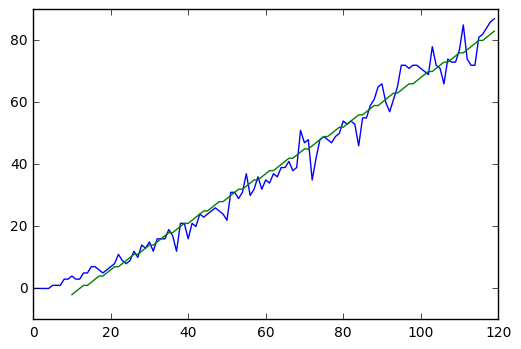

In [3]:
num_to_skip = 10

data = pd.DataFrame({'x': range(num_to_skip,len(by_9s)), 'y': by_9s[num_to_skip:]})
lm = smf.ols(formula='y ~ x', data=data).fit()
print lm.params

X = pd.DataFrame({'x': range(num_to_skip,len(by_9s))})
preds = lm.predict()
plt.plot(by_9s)
plt.plot(X, map(round, preds))

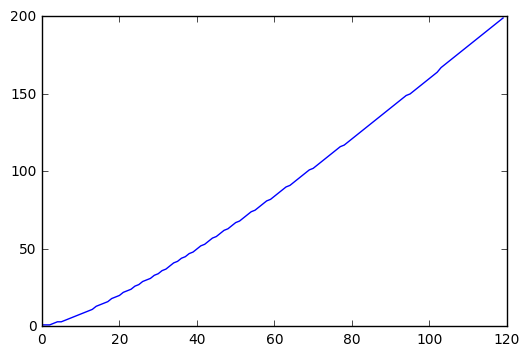

In [4]:
plt.plot(sums)

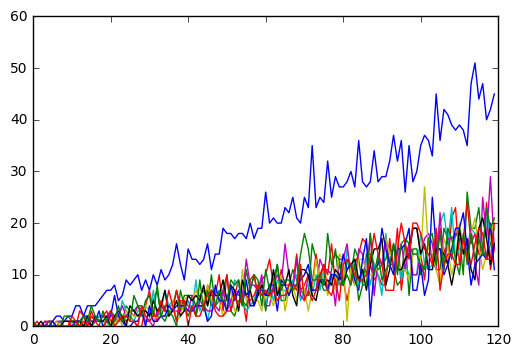

In [5]:
d = { str(i): None for i in range(10) }
for i in range(10):
    d[str(i)] = [f[i] for f in fs]

plt.plot(pd.DataFrame(d))